# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color,total_sulfur_dioxide,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,NaN,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,NaN,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,NaN,Moderately_High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,NaN,Low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [2]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()

low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low_alcohol = low['quality'].mean()
mean_quality_high_alcohol = high['quality'].mean()

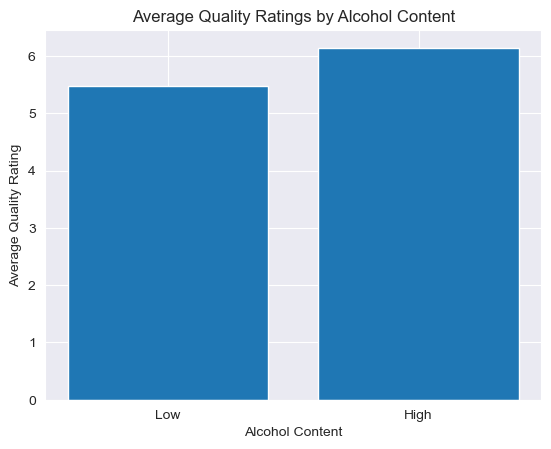

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low_alcohol, mean_quality_high_alcohol]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [4]:
# Use groupby to get the mean quality for each acidity level
acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()
acidity_level_mean

acidity_levels
High               5.783469
Low                5.859593
Medium             5.850832
Moderately_High    5.784540
Name: quality, dtype: float64

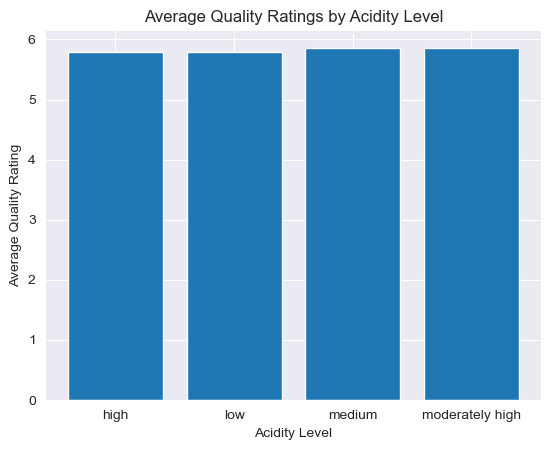

In [5]:
# Create a bar chart with proper labels
locations = [2,3,4,1]
heights = acidity_level_mean
labels = ['low','medium','moderately high','high']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');